The model is built on **Google collaboratory**, which runs on Linux Environment.

The root folder here is **Google drive**. This is because in Google Collaboratory although there are privelages of having a free GPU and TPU, the session whenever restarted causes the deletion of the files and folders. Hence using Google drive as the root folder is suggested.

IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np

import os

import uuid

import tensorflow as tf

The pip install in comments must be installed only at the first time execution of the code. or else colab infers restarting the runtime

In [2]:
#files that need to be pip installed
!pip install --upgrade pyqt5 lxml

#!pip install tensorflow --upgrade

#!pip uninstall protobuf matplotlib -y
#!pip install protobuf matplotlib==3.2
!pip install Pillow
!pip install pyyml

#so we dont run inot module errors
!pip install pytz

#!pip install tensorflow-gpu

!pip install gin
!pip install pycocotools
!pip install tensorflow-addons
!pip install tensorflowjs

In [3]:
labels= os.listdir("/content/drive/MyDrive/Tensorflow/workspace/images/collected_images")

In [4]:
number_of_labels= len(labels)

In [5]:
IMAGES_PATH = os.path.join('Tensorflow', 'workspace', 'images', 'collected_images')

In [6]:
'''

to be used when uploading files using webcam in real time

if not os.path.exists(IMAGES_PATH):
    if os.name == 'posix':
        !mkdir -p {IMAGES_PATH}
    if os.name == 'nt':
         !mkdir {IMAGES_PATH}
for label in labels:
    path = os.path.join(IMAGES_PATH, label)
    if not os.path.exists(path):
        !mkdir {path}

'''
 
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

'''

to colleect images using webcam

for label in labels:

    #cap = cv2.VideoCapture("http://192.168.1.2:4747/shot.jpg")
    #address= "http://192.168.1.2:4747/video"
    #cap.open(address)

    cap = cv2.VideoCapture(0)
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    for imgnum in range(number_imgs):
        print('Collecting image {}'.format(imgnum))
        ret, frame = cap.read()
        imgname = os.path.join(IMAGES_PATH,label,label+'.'+'{}.jpg'.format(str(uuid.uuid1())))
        cv2.imwrite(imgname, frame)
        cv2.imshow('frame', frame)
        time.sleep(2)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

'''

'\n\nto colleect images using webcam\n\nfor label in labels:\n\n    #cap = cv2.VideoCapture("http://192.168.1.2:4747/shot.jpg")\n    #address= "http://192.168.1.2:4747/video"\n    #cap.open(address)\n\n    cap = cv2.VideoCapture(0)\n    print(\'Collecting images for {}\'.format(label))\n    time.sleep(5)\n    for imgnum in range(number_imgs):\n        print(\'Collecting image {}\'.format(imgnum))\n        ret, frame = cap.read()\n        imgname = os.path.join(IMAGES_PATH,label,label+\'.\'+\'{}.jpg\'.format(str(uuid.uuid1())))\n        cv2.imwrite(imgname, frame)\n        cv2.imshow(\'frame\', frame)\n        time.sleep(2)\n        if cv2.waitKey(1) & 0xFF == ord(\'q\'):\n            break\ncap.release()\ncv2.destroyAllWindows()\n\n\n'

ADDING LABELS AND ANNOTATIONS

However I performed the action locally on the computer. A seperated enviroment is preferred and annotation is done with **Label Image**

In [7]:
LABELIMG_PATH = os.path.join('/content/drive/MyDrive/Tensorflow', 'labelimg')
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

In [8]:
if os.name == 'posix':
    !cd {LABELIMG_PATH} && make qt5py3
if os.name =='nt':
    !cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc

pyrcc5 -o libs/resources.py resources.qrc


In [ ]:
'''
this hence launches the Label Image window. basically working on colab
doesnt do anythin since there is an issue with the plugin. hence try following the same steps
in Jupyter notebook
'''
!cd {LABELIMG_PATH} && python labelImg.py

In [10]:
TRAIN_PATH = os.path.join('/content/drive/MyDrive/Tensorflow', 'workspace', 'images', 'train')
TEST_PATH = os.path.join('/content/drive/MyDrive/Tensorflow', 'workspace', 'images', 'test')
ARCHIVE_PATH = os.path.join('/content/drive/MyDrive/Tensorflow', 'workspace', 'images', 'archive.tar.gz')

In [11]:
!tar -czf {ARCHIVE_PATH} {TRAIN_PATH} {TEST_PATH}

tar: Removing leading `/' from member names


Now we start training the model.
We pick our models from **TensorFlow 2 Detection Model Zoo**, url= "https://github.com/sagar-das-crypto/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md", by using the Pretrained model URL, which can be found based of the model of choice

Here we use **SSD Mobilenet V2 FPNLite 320X320 Model**, trained on the COCO dataset. We can change the models as per our requirement based on the **time** in microseconds and **coco MAP** which is an accracy score

In [12]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'#customizable
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'#customizable
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'#customizable
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [13]:
paths = {
    'WORKSPACE_PATH': os.path.join('/content/drive/MyDrive/Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('/content/drive/MyDrive/Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('/content/drive/MyDrive/Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('/content/drive/MyDrive/Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('/content/drive/MyDrive/Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('/content/drive/MyDrive/Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('/content/drive/MyDrive/Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('/content/drive/MyDrive/Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('/content/drive/MyDrive/Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('/content/drive/MyDrive/Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('/content/drive/MyDrive/Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('/content/drive/MyDrive/Tensorflow','protoc')
 }

In [14]:
files = {
    'PIPELINE_CONFIG':os.path.join('/content/drive/MyDrive/Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [15]:
drive_path= "/content/drive/MyDrive/Tensorflow"

In [16]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

Download the models from TensorFlow 2 Detection Model Zoo and install tfod.
https://www.tensorflow.org/install/source_windows

In [17]:
if os.name=='nt':
    !pip install wget
    import wget

In [18]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Install **Tensorflow Object Detection** 

In [19]:
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd {drive_path}/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd {drive_path}/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd {drive_path}/models/research/slim && pip install -e .

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Processing /content/drive/MyDrive/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1661032 sha256=70622f6fea27379b8e78de49cd66bafb684b4787eb576675e23256ec389bf5f0
  Stored i

Verify Installation

In [20]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')

!python {VERIFICATION_SCRIPT}

2021-08-26 12:15:41.042289: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-08-26 12:15:41.042359: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (149210706f65): /proc/driver/nvidia/version does not exist
Running tests under Python 3.7.11: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-08-26 12:15:41.053022: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0826 12:15:41.348678 140674620114816 model_builder.py:1088] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2

In [21]:
#this needs to be imported currently and not before
import object_detection

In [22]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2021-08-26 12:16:19--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.31.128, 2607:f8b0:400c:c02::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.31.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  99.3MB/s    in 0.2s    

2021-08-26 12:16:19 (99.3 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/

TFOD api installation complete

Next we create a **Label Map**

In [23]:
labelss = [{'name':'elton john', 'id':1}, {'name':'jerry seinfeld', 'id':2}, {'name':'maddona', 'id':3}, {'name':'mindy kaling', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labelss:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [24]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

content/drive/MyDrive/Tensorflow/workspace/images/train/
content/drive/MyDrive/Tensorflow/workspace/images/train/Elton John Face Images_ Stock Photos....jpg
content/drive/MyDrive/Tensorflow/workspace/images/train/Elton John (Glasses) Celebrity Mask....jpg
content/drive/MyDrive/Tensorflow/workspace/images/train/Elton John_s right – UK musicians face....jpg
content/drive/MyDrive/Tensorflow/workspace/images/train/Elton John After Star_s Dog Scratched....jpg
content/drive/MyDrive/Tensorflow/workspace/images/train/Jerry Seinfeld _ Biography_ TV Shows....jpg
content/drive/MyDrive/Tensorflow/workspace/images/train/Does Jerry Seinfeld Still....jpg
content/drive/MyDrive/Tensorflow/workspace/images/train/Jerry Seinfeld in Comedian....jpg
content/drive/MyDrive/Tensorflow/workspace/images/train/Jerry Seinfeld - Emmy Awards....jpg
content/drive/MyDrive/Tensorflow/workspace/images/train/_500K Plastic Surgery....jpg
content/drive/MyDrive/Tensorflow/workspace/images/train/Madonna_s Face Looks Stunning

In [25]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [26]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')}

2021-08-26 12:16:23.644412: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Successfully created the TFRecord file: /content/drive/MyDrive/Tensorflow/workspace/annotations/train.record
2021-08-26 12:16:27.057255: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Successfully created the TFRecord file: /content/drive/MyDrive/Tensorflow/workspace/annotations/test.record


In [27]:
#copy models config to training folder

if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

In [28]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [29]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [30]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)

In [31]:
#changes made to the pipeline_config file

pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.optimizer.momentum_optimizer.learning_rate.cosine_decay_learning_rate.total_steps=2000
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.num_steps=2000
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [32]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)

Training the Model

In [33]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [34]:
!{command}

2021-08-26 12:16:31.697335: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-08-26 12:16:31.697394: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (149210706f65): /proc/driver/nvidia/version does not exist
2021-08-26 12:16:31.698050: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0826 12:16:31.699182 139787552970624 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0826 12:16:31.702377 139787552970624 mirrored

Evaluate the Model

In [35]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [36]:
!{command}

2021-08-26 12:17:22.248929: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-08-26 12:17:22.248985: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (149210706f65): /proc/driver/nvidia/version does not exist
W0826 12:17:22.254431 139818750916480 model_lib_v2.py:1082] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I0826 12:17:22.254753 139818750916480 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0826 12:17:22.254863 139818750916480 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0826 12:17:22.254966 139818750916480 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W0826 12:17:22.255135 139818750916480 mod

Load Train Model From Checkpoint

In [37]:
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [38]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
#the ckpt-4 must be altered if better training is achieved when used from the checkpoint
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-4')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

For graphically checking the performance of our model in **Tensorboard**.
Favourably works on Command Prompt

In [39]:
#cd /content/drive/MyDrive/Tensorflow/workspace/models/my_ssd_mobnet/train

In [40]:
#!tensorboard --logdir=.

In [41]:
#cd /content/drive/MyDrive/Tensorflow/workspace/models/my_ssd_mobnet/eval

In [42]:
#!tensorboard --logdir=.

Detect from an Image

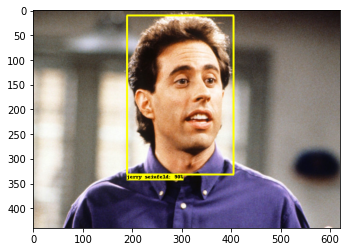

In [43]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


#uploading the files manually
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Jerry Seinfeld_ I Don_t Regret Turning....jpg')
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
'''
#for webcam


cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break





'''

"\n#for webcam\n\n\ncap = cv2.VideoCapture(0)\nwidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))\nheight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))\n\nwhile cap.isOpened(): \n    ret, frame = cap.read()\n    image_np = np.array(frame)\n    \n    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)\n    detections = detect_fn(input_tensor)\n    \n    num_detections = int(detections.pop('num_detections'))\n    detections = {key: value[0, :num_detections].numpy()\n                  for key, value in detections.items()}\n    detections['num_detections'] = num_detections\n\n    # detection_classes should be ints.\n    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)\n\n    label_id_offset = 1\n    image_np_with_detections = image_np.copy()\n\n    viz_utils.visualize_boxes_and_labels_on_image_array(\n                image_np_with_detections,\n                detections['detection_boxes'],\n                detections['detection_class

Freezing the Model

In [45]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [46]:
!{command}

2021-08-26 12:19:06.572796: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-08-26 12:19:06.572853: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (149210706f65): /proc/driver/nvidia/version does not exist
2021-08-26 12:19:06.583919: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0826 12:19:06.772950 140703743960960 deprecation.py:616]

Conversion to **TFJS**

In [47]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [48]:
!{command}

2021-08-26 12:20:12.450147: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-08-26 12:20:12.450215: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (149210706f65): /proc/driver/nvidia/version does not exist
2021-08-26 12:20:12.450585: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-26 12:20:25.441332: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-08-26 12:20:25.441579: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-08-26 12:20:25.638287: I tensorflow/co

Conversion to **TF-Lite**

In [49]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [50]:
!{command}

2021-08-26 12:20:45.025702: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-08-26 12:20:45.025768: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (149210706f65): /proc/driver/nvidia/version does not exist
2021-08-26 12:20:45.036235: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
W0826 12:20:56.752686 139856566814592 save_impl.py:72] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7f327d1e7690>, because it is not built.
W0826 12:20:57.043186 139856566814592 save_impl.py:72] Skipping full serializati

In [51]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [52]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [53]:
!{command}

2021-08-26 12:21:38.797628: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-08-26 12:21:38.797689: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (149210706f65): /proc/driver/nvidia/version does not exist
2021-08-26 12:21:39.365751: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-26 12:21:52.941627: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2021-08-26 12:21:52.941693: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored drop_control_dependency.
2021-08-26 12:21:52.941716: W tenso

After saving the tfjs and tflite files, the model is ready to be deployed.

However this is not the first time run of the model. The model we ran here is based on subsequent checkpoints achieved while the model was built. Hence the output of certain cells may not match to those who are running the model for the first time.

Also this model is trained such that, the files are overwritten in the Google Drive which is choosen as the root folder due to the session and file uploading issues in Google Collaboratory.